#  Linear Regression Models for Genetic Association Analyses

## Data preprocessinga and Exploratory data analysis (EDA) to understand risk score distribution and ancestry group characteristics.

This project was originally developed in Posit Cloud Studio using R, with subsequent conversion to an R Jupyter Notebook. The original .Rmd file was converted using a process outlined in [https://gist.github.com/ramnathv/10012123](#Ramnath V's GitHub Gist).


In [4]:
#################################
## Packages Download & Loading ##
#################################

# tidyverse and ggplot2 for visualisation
install.packages("tidyverse")
library(tidyverse)
library(dplyr)

install.packages("ggplot2")
library(ggplot2)

# patchwork for visualisation of ggplots side by side
install.packages("patchwork")  # Install if not already
library(patchwork)



The downloaded binary packages are in
	/var/folders/vv/_8tk6bg16fz1hwpdsckk3k000000gn/T//Rtmp2m9mOR/downloaded_packages

The downloaded binary packages are in
	/var/folders/vv/_8tk6bg16fz1hwpdsckk3k000000gn/T//Rtmp2m9mOR/downloaded_packages

The downloaded binary packages are in
	/var/folders/vv/_8tk6bg16fz1hwpdsckk3k000000gn/T//Rtmp2m9mOR/downloaded_packages


In [6]:
######################
## Data Preparation ##
######################

# Loading the data from csv file into a variable
gwas_data <- read.csv("input/assignment.9.csv")


In [7]:
###################################
#### Exploratory Data Analysis ####
###################################

###############
## Data type ##
###############

# Specifying the ancestry as a factor
gwas_data$ancestry <- as.factor(gwas_data$ancestry)

# Specifying the SNP allele type as a factor
gwas_data <- gwas_data %>% # pass the output as the input of gwas_data
  mutate(across               # modifies the existing data across specified columns
         (starts_with("SNP"), # finding all columns that start with "SNP"
           as.factor))

# checking if worked with "sapply" that takes each element of a data frame
# and returns a vector
sapply(gwas_data, is.factor)

individual   ancestry risk_score       SNP1       SNP2       SNP3       SNP4 
     FALSE       TRUE      FALSE       TRUE       TRUE       TRUE       TRUE 
      SNP5 
      TRUE

In [12]:

###########################
## Ancestry Descriptives ##
###########################

# Calculating the count of individuals in each ancestry group
ancestry_count <- table(gwas_data$ancestry)

# Calculate the mean risk score for each ancestry group
mean_risk_by_ancestry <- tapply(gwas_data$risk_score, gwas_data$ancestry, mean)

# Normality check for ancestry group 1 and 2
shapiro.test(gwas_data$risk_score[gwas_data$ancestry == 1])
shapiro.test(gwas_data$risk_score[gwas_data$ancestry == 2])

# Dividing the data by ancestry
ancestry1 <- subset(gwas_data, ancestry==1)
ancestry2 <- subset(gwas_data, ancestry==2)



	Shapiro-Wilk normality test

data:  gwas_data$risk_score[gwas_data$ancestry == 1]
W = 0.97805, p-value = 0.374



	Shapiro-Wilk normality test

data:  gwas_data$risk_score[gwas_data$ancestry == 2]
W = 0.98114, p-value = 0.7055


In [14]:
#############################
## Risk Score Descriptives ##
#############################

# Calculating the Mean and Median of the risk score
mean_risk_score <- mean(gwas_data$risk_score)
median_risk_score <- median(gwas_data$risk_score)

# Standard Deviation of the risk score
sd_risk_score <- sd(gwas_data$risk_score)

# Range of risk score values
range_risk_score <- range(gwas_data$risk_score)
range_value_risk_score <- diff(range_risk_score) #Difference between max and min


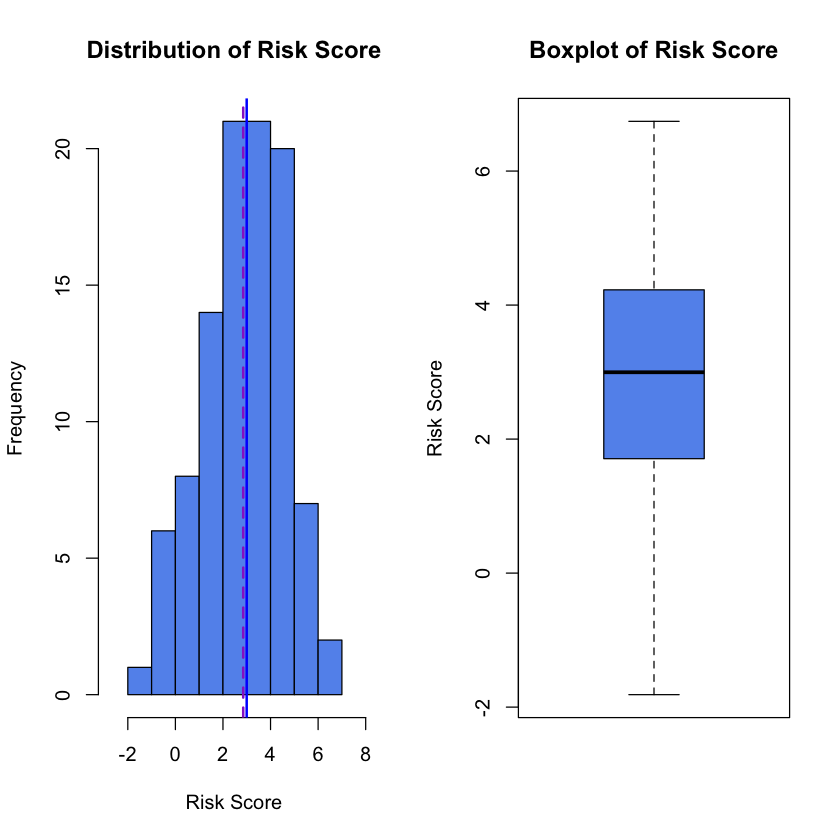

In [15]:
#############################
## Plotting the Risk Score ##
#############################

# Combining risk score figures
par(mfrow = c(1, 2))

# Visualising the distribution of the risk score
hist_risk_score <- hist(gwas_data$risk_score,
                        main = "Distribution of Risk Score",
                        xlab = "Risk Score",
                        col = "cornflowerblue",
                        xlim = c(min(gwas_data$risk_score) - 1,
                                 max(gwas_data$risk_score) + 1), # adjusting limits of x axis
                        breaks = 8)  # adjusting bins to check, but ultimately following the Sturges' rule as it works best 
# Add vertical lines for the mean and median
abline(v = mean_risk_score, col = "darkorchid", lwd = 2, lty = 2)  # purple dashed line for mean
abline(v = median_risk_score, col = "blue", lwd = 2, lty = 1)  # blue line for median

# Boxplot for risk_score dispersion
boxplot_risk_score <- boxplot(gwas_data$risk_score,
                              main = "Boxplot of Risk Score",
                              ylab = "Risk Score", col = "cornflowerblue")

quartz_off_screen 
                3

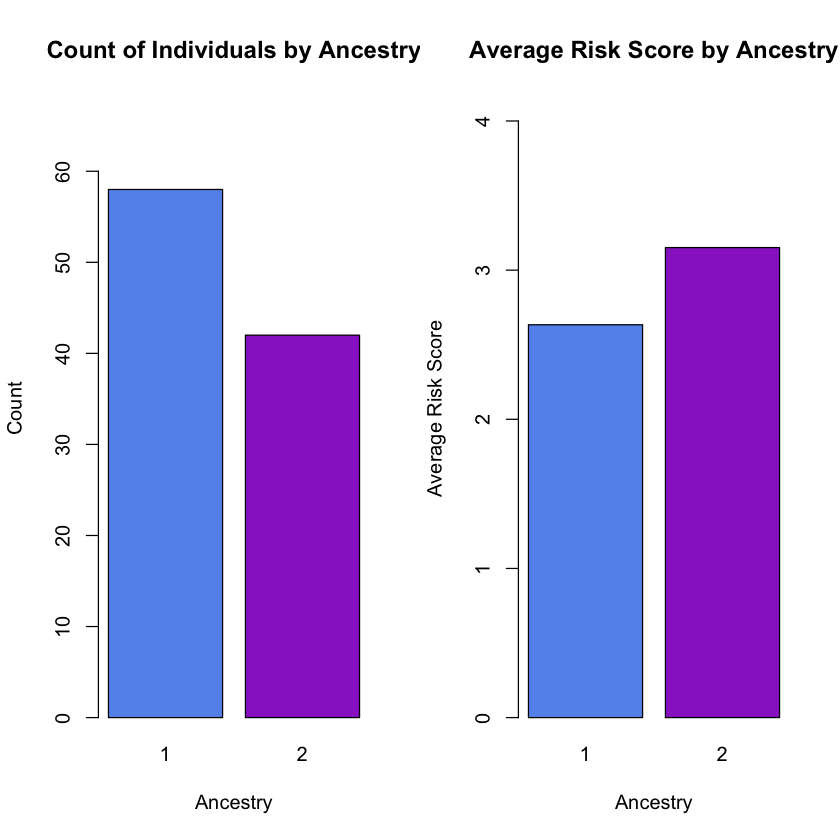

In [18]:

########################
## Plotting  Ancestry ##
########################

# Combining figures
par(mfrow = c(1, 2))

# Creating a simple barplot of the count of individuals by ancestry
barplot(ancestry_count, 
        main = "Count of Individuals by Ancestry", 
        xlab = "Ancestry", 
        ylab = "Count", 
        col = c("cornflowerblue", "darkorchid"),
        ylim = c(0, max(ancestry_count) + 10))  #extending the y-axis

# Create a simple barplot
barplot(mean_risk_by_ancestry, 
        main = "Average Risk Score by Ancestry", 
        xlab = "Ancestry", 
        ylab = "Average Risk Score", 
        col = c("cornflowerblue", "darkorchid"),  # same colour for bars
        ylim = c(0, max(mean_risk_by_ancestry) + 1)) # extending the y-axis

# Closing the PNG
dev.off()

# Box plot to check for distribution differences in risk score across ancestry
Risk_Score_byAncestry <- ggplot(gwas_data,
                                aes(x = as.factor(ancestry), y = risk_score)) +
  geom_boxplot(aes(fill = as.factor(ancestry)), alpha = 0.7) +
  labs(x = "Ancestry Group", y = "Risk Score",
       title = "Risk Score Distribution by Ancestry Group") +
  scale_fill_manual(values = c("cornflowerblue", "darkorchid2")) +
  theme_bw()


In [19]:

#######################
## SNPs Descriptives ##
#######################

# Counting the occurrences of 0 and 1 for each SNP
snp_counts <- sapply(gwas_data[, c("SNP1", "SNP2", "SNP3", "SNP4", "SNP5")], 
                     function(x) table(factor(x, levels = c(0, 1))))
## Checking the distribution of 0 and 1 allele for the different ancestry groups
# on each SNP 
# Counting the occurrence of SNP variants (0 and 1) for each ancestry group
snp_counts_by_ancestry1 <- table(gwas_data$SNP1, gwas_data$ancestry)
snp_counts_by_ancestry2 <- table(gwas_data$SNP2, gwas_data$ancestry)
snp_counts_by_ancestry3 <- table(gwas_data$SNP3, gwas_data$ancestry)
snp_counts_by_ancestry4 <- table(gwas_data$SNP4, gwas_data$ancestry)
snp_counts_by_ancestry5 <- table(gwas_data$SNP5, gwas_data$ancestry)

# Combining the SNPs and ancestry counts into a single matrix
all_snp_counts <- cbind(snp_counts_by_ancestry1, snp_counts_by_ancestry2,
                        snp_counts_by_ancestry3, snp_counts_by_ancestry4,
                        snp_counts_by_ancestry5)

# Adding Labels to the columns
colnames(all_snp_counts) <- c("SNP1_A1", "SNP1_A2", "SNP2_A1",
                              "SNP2_A2", "SNP3_A1", "SNP3_A2",
                              "SNP4_A1", "SNP4_A2", "SNP5_A1", "SNP5_A2")

# checking if it worked
print(all_snp_counts)

  SNP1_A1 SNP1_A2 SNP2_A1 SNP2_A2 SNP3_A1 SNP3_A2 SNP4_A1 SNP4_A2 SNP5_A1
0      58       3      26      25      58       2      58       2      58
1       0      39      32      17       0      40       0      40       0
  SNP5_A2
0       3
1      39


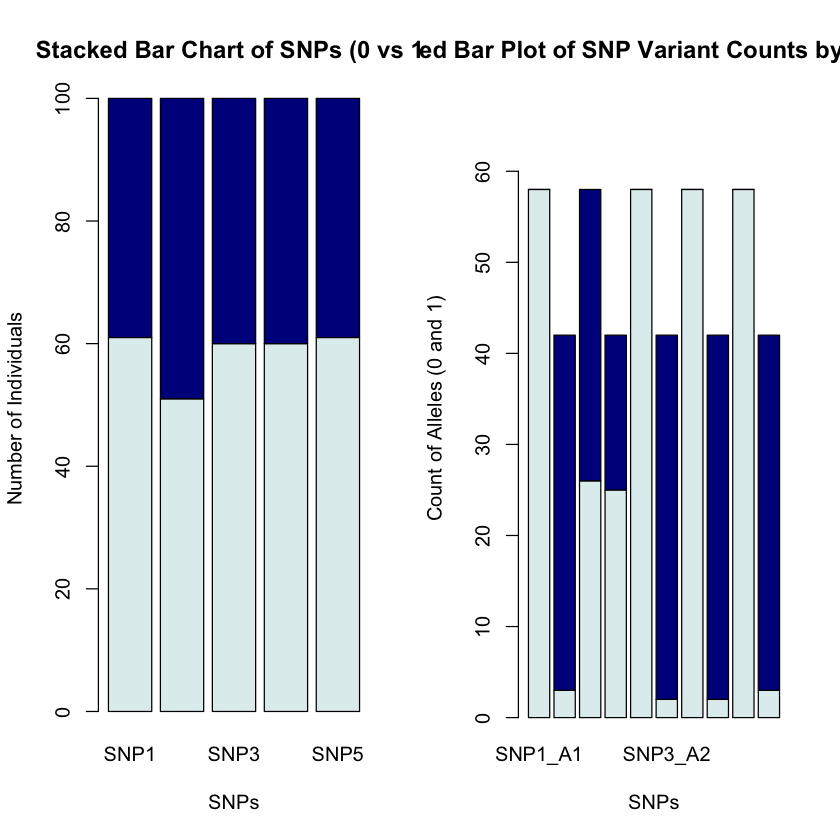

In [20]:

########################
## Plotting the SNPs ##
#######################

# Combining risk score figures
par(mfrow = c(1, 2))

# Plotting the stacked bar chart for each SNP
barplot(snp_counts, 
        beside = FALSE,  # Stacked bar chart
        col = c("azure2", "blue4"), # Colors for 0 and 1
        main = "Stacked Bar Chart of SNPs (0 vs 1)", 
        xlab = "SNPs", 
        ylab = "Number of Individuals")

# Create the barplot
barplot(all_snp_counts, beside = FALSE, col = c("azure2", "blue4"),
        main = "Stacked Bar Plot of SNP Variant Counts by Ancestry",
        xlab = "SNPs", ylab = "Count of Alleles (0 and 1)",
        ylim = c(0, max(all_snp_counts) + 10))
